In [1]:
import os
import glob
import csv
from datetime import datetime

# 创建结果文件名
now = datetime.now()
date_string = now.strftime("%Y-%m-%d")
result_filename = f"result_avg_accs_tag_{date_string}.csv"

# 遍历子目录下的txt文件并读取数据
root_folder = "./ViT_results/test_VIT_food101_5"  # 您需要替换为实际的根文件夹路径
data_dict = {}

max_columns = 0  # 最大列数

for foldername, subfolders, filenames in os.walk(root_folder):
    if "results" in subfolders:
        result_folder = os.path.join(foldername, "results")
        # 查找最新创建日期的txt文件
        txt_files = glob.glob(os.path.join(result_folder, "avg_accs_tag-*.txt"))

        if txt_files:
            latest_file = max(txt_files, key=os.path.getctime)
            with open(latest_file, 'r') as file:
                data = file.readlines()
                data_values = [float(val.strip()) for line in data for val in line.split("\t")]

                max_columns = max(max_columns, len(data_values))  # 更新最大列数

            folder_name = os.path.basename(foldername)
            data_dict[folder_name] = data_values

# 写入CSV文件
with open(result_filename, mode='w', newline='') as file:
    writer = csv.writer(file)

    # 写入表头
    header = ['Method'] + list(range(1, max_columns+1))
    writer.writerow(header)

    # 写入数据
    for folder_name, values in data_dict.items():
        row_values = [folder_name] + values + [None]*(max_columns-len(values))  # 添加空值以达到最大列数
        writer.writerow(row_values)

import pandas as pd

# 读取CSV文件
df = pd.read_csv(result_filename)

# 按最后一列从大到小排序
df_sorted = df.sort_values(by=df.columns[-1], ascending=False)

# 输出排序结果到屏幕上
print(df_sorted)


                                               Method         1         2  \
15                                    food101_bic_bic  0.945143  0.841300   
0   food101_olwf_asym_original_ViTrenyi_0.85_scale...  0.941714  0.849471   
8   food101_olwf_asym_original_ViTrenyi_0.06_scale...  0.941714  0.787462   
4   food101_olwf_asym_original_ViTrenyi_0.01_scale...  0.941714  0.789410   
1   food101_olwf_asym_original_ViT+Replay_0.85_sca...  0.941714  0.699757   
2   food101_olwf_asym_original_ViT+Replay_0.85_sca...  0.941714  0.689038   
12  food101_finetuning_finetuning_food101_tasks_5_...  0.941714  0.785948   
9   food101_olwf_asym_original_ViT+Replay_0.06_sca...  0.941714  0.680281   
5   food101_olwf_asym_original_ViT+Replay_0.01_sca...  0.941714  0.667257   
3   food101_olwf_asym_original_ViT+Replay_0.85_sca...  0.941714  0.666619   
10  food101_olwf_asym_original_ViT+Replay_0.06_sca...  0.941714  0.678829   
6   food101_olwf_asym_original_ViT+Replay_0.01_sca...  0.941714  0.660205   

In [10]:
!pip install mplcyberpunk

/bin/bash: pip: command not found


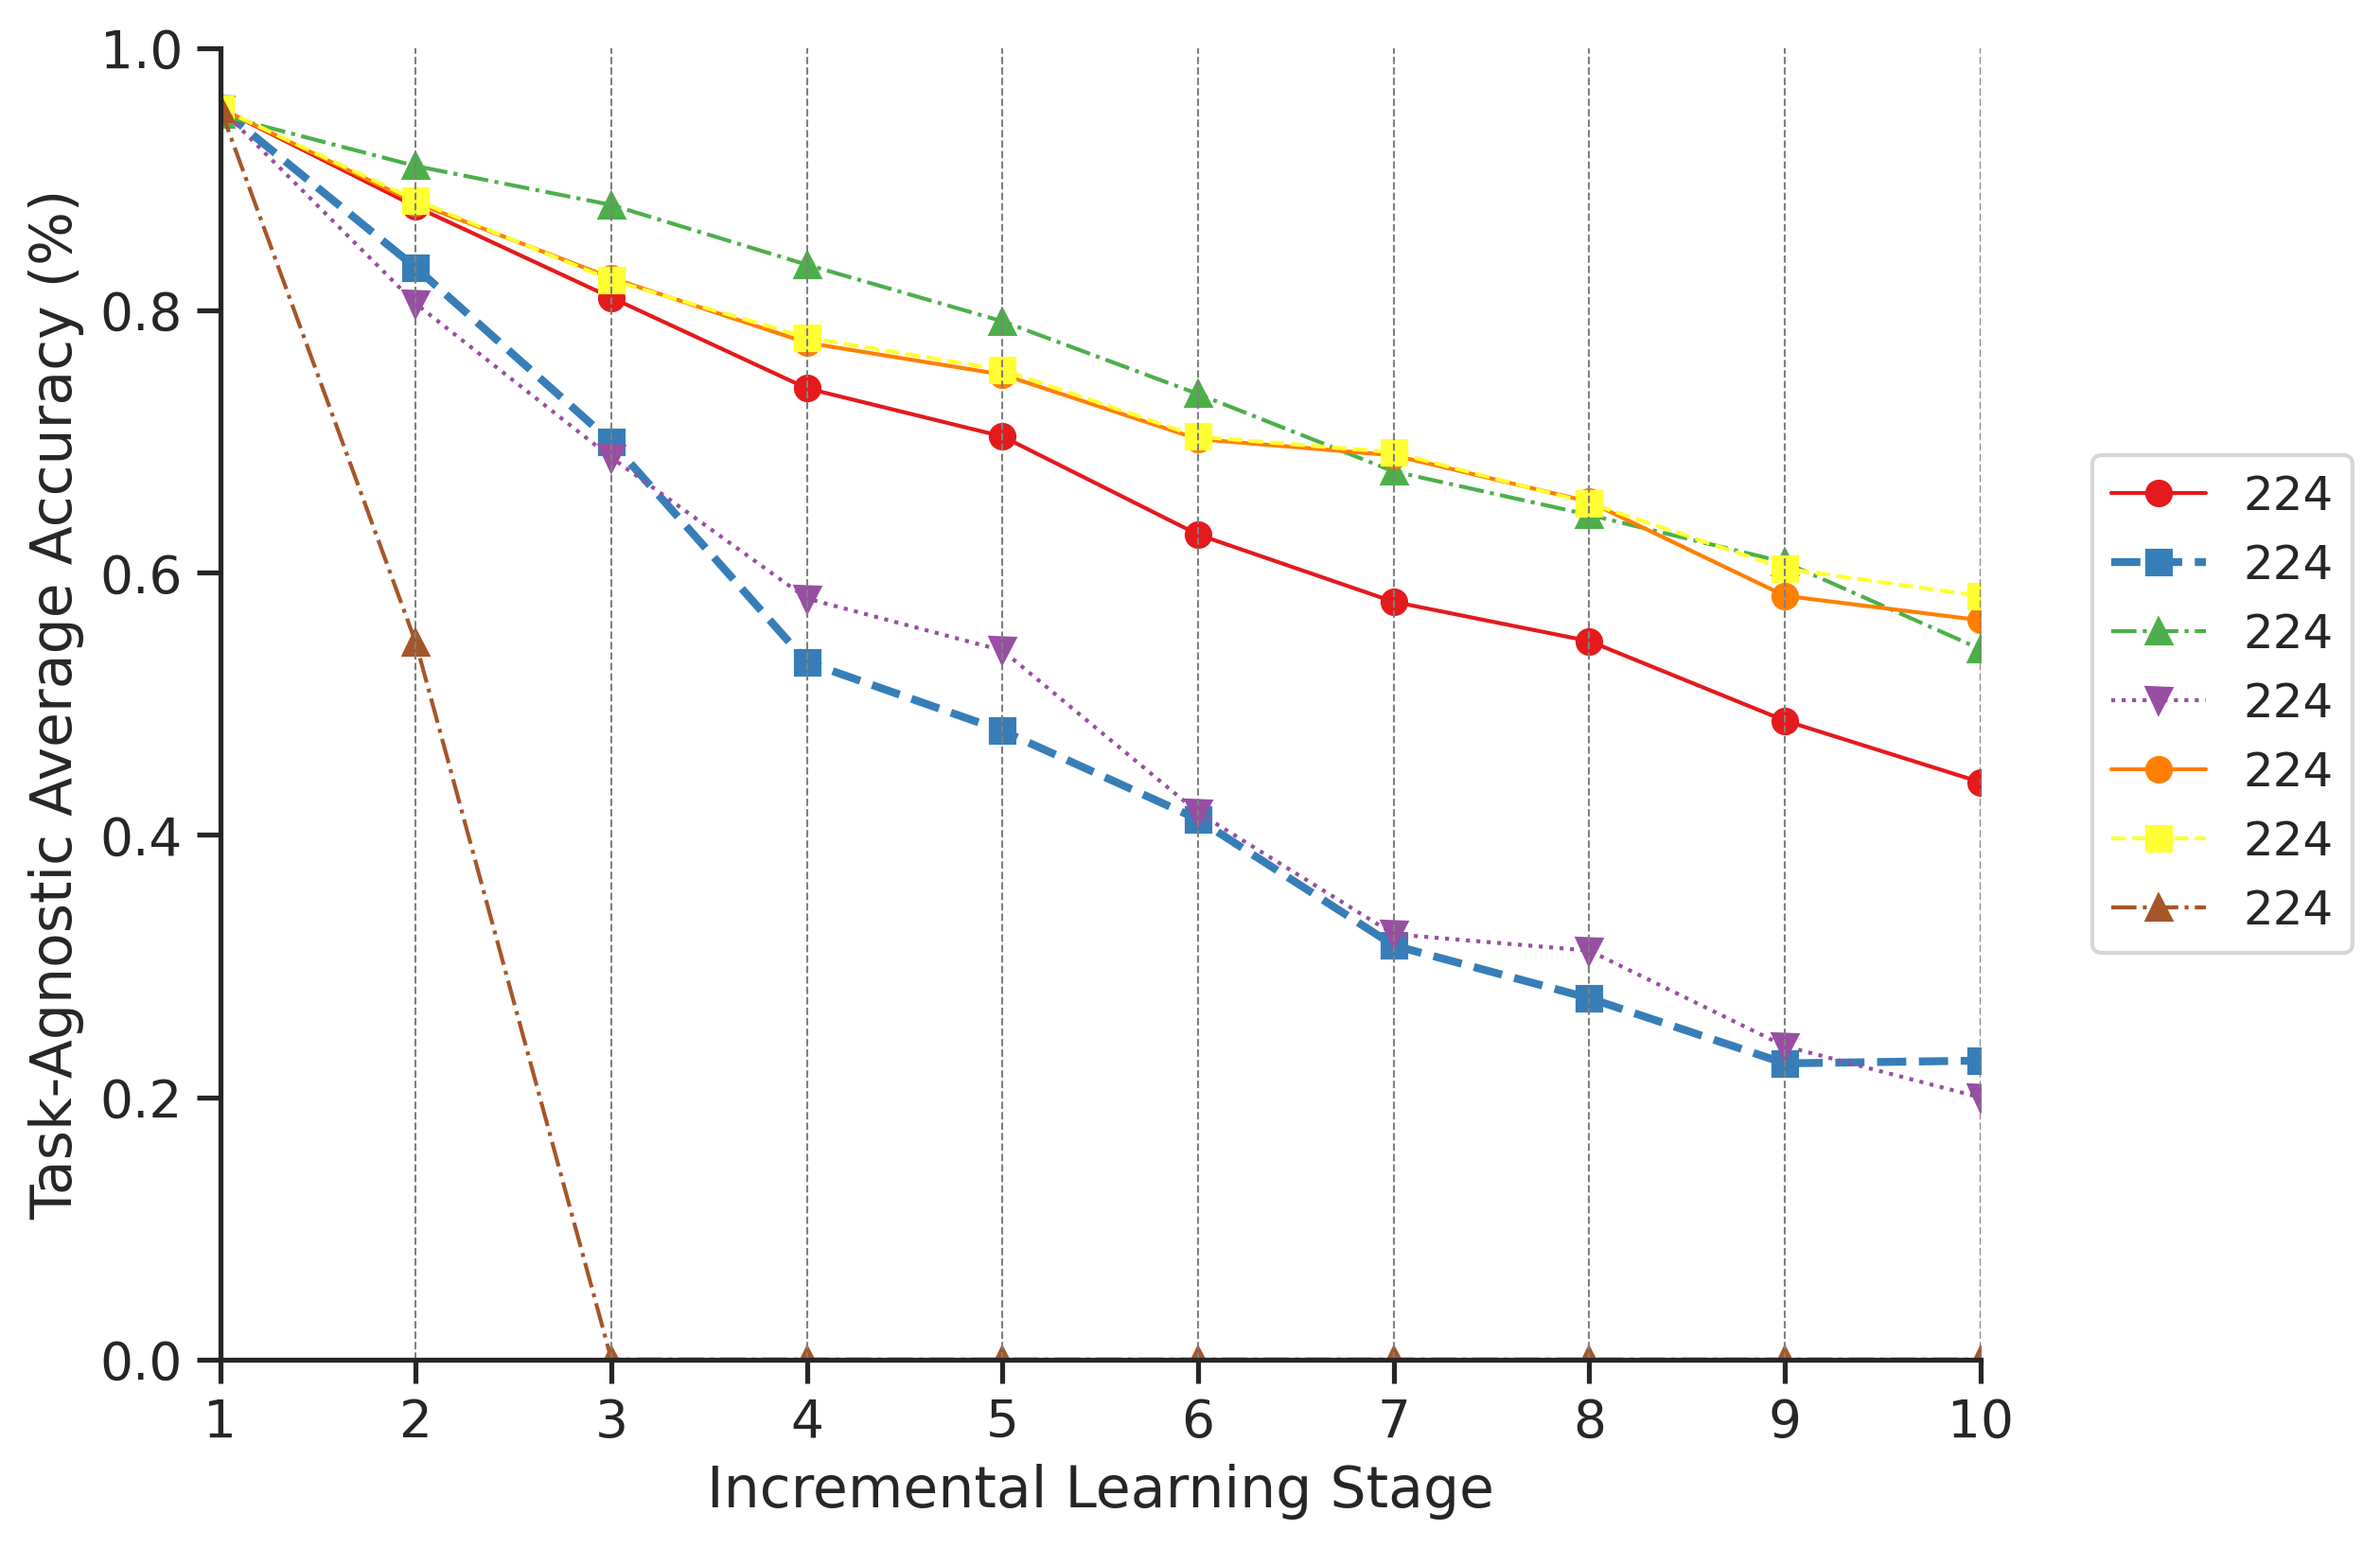

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import mplcyberpunk
from matplotlib.lines import Line2D

# 获取当前日期
now = datetime.now()
date_string = now.strftime("%Y-%m-%d")

# 读取CSV文件
df = pd.read_csv(result_filename)

# 设置画布大小和分辨率
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# 使用seaborn设置专业风格
sns.set(style="ticks", font_scale=1.2)

# 绘制平滑曲线
x = range(1, df.shape[1])
labels = []
linestyles = ['-', '--', '-.', ':']  # 虚线样式列表
markerstyles = ['o', 's', '^', 'v']  # 端点标记样式列表
colors = sns.color_palette("Set1", n_colors=len(df))  # 从Seaborn调色板获取颜色列表
lines = []  # 存储Line2D对象
for i, row in df.iterrows():
    method = row['Method']
    values = row[1:].tolist()[:df.shape[1]-1]  # 去掉最后一列
    linestyle = linestyles[i % len(linestyles)]
    markerstyle = markerstyles[i % len(markerstyles)]
    color = colors[i]
    
    if "oewc" in method:
        linewidth = 2  # 设置线条粗细为2
    else:
        linewidth = 1  # 使用默认线条粗细
    
    line, = plt.plot(x, values, label=method, lw=linewidth, linestyle=linestyle, marker=markerstyle, color=color)
    lines.append(line)
    labels.append(method.split('_')[1])  # 获取label值中第一个_和第二个_之间的部分

# 设置 X 和 Y 轴的范围
plt.xlim(1, df.shape[1]-1)
plt.ylim(0, 1)

# 设置X轴刻度标签为整数
plt.xticks(range(1, df.shape[1]), range(1, df.shape[1]))

# 添加标签
plt.xlabel('Incremental Learning Stage')  # 设置X轴标题
plt.ylabel('Task-Agnostic Average Accuracy (%)')  # 设置Y轴标题

# 创建图例
legend_elements = [Line2D([0], [0], color=line.get_color(), linestyle=line.get_linestyle(),
                          marker=line.get_marker(), lw=line.get_linewidth())
                   for line in lines]
plt.legend(legend_elements, labels, loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')

# 增加每个X轴上的列分割线
for val in range(1, df.shape[1]):
    plt.axvline(x=val, linestyle='--', color='gray', linewidth=0.5)

# 移除顶部和右侧的边框
sns.despine()

# 使用mplcyberpunk样式装饰图形，创建医学风格
# mplcyberpunk.add_glow_effects()

# 保存为矢量图格式（PDF、EPS，或SVG）以获得更高质量的输出
plt.savefig(f'curve_plot_{date_string}.pdf', format='pdf', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()


In [12]:
#读取avg_forg_tag

import os
import glob
import csv
from datetime import datetime

# 创建结果文件名
now = datetime.now()
date_string = now.strftime("%Y-%m-%d")
result_filename = f"result_avg_forg_tag_{date_string}.csv"

# 遍历子目录下的txt文件并读取数据
# root_folder = "./results_ViT_S_MedMNIST_ALL_0719"  # 您需要替换为实际的根文件夹路径
data_dict = {}

max_columns = 0  # 最大列数

for foldername, subfolders, filenames in os.walk(root_folder):
    if "results" in subfolders:
        result_folder = os.path.join(foldername, "results")
        # 查找最新创建日期的txt文件
        txt_files = glob.glob(os.path.join(result_folder, "avg_forg_tag-*.txt"))

        if txt_files:
            latest_file = max(txt_files, key=os.path.getctime)
            with open(latest_file, 'r') as file:
                data = file.readlines()
                data_values = [float(val.strip()) for line in data for val in line.split("\t")]

                max_columns = max(max_columns, len(data_values))  # 更新最大列数

            folder_name = os.path.basename(foldername)
            data_dict[folder_name] = data_values

# 写入CSV文件
with open(result_filename, mode='w', newline='') as file:
    writer = csv.writer(file)

    # 写入表头
    header = ['Method'] + list(range(1, max_columns+1))
    writer.writerow(header)

    # 写入数据
    for folder_name, values in data_dict.items():
        row_values = [folder_name] + values + [None]*(max_columns-len(values))  # 添加空值以达到最大列数
        writer.writerow(row_values)

import pandas as pd

# 读取CSV文件
df = pd.read_csv(result_filename)

# 按最后一列从大到小排序
df_sorted = df.sort_values(by=df.columns[-1], ascending=True)

# 输出排序结果到屏幕上
print(df_sorted)




                                              Method    1      2       3  \
6  cifar100_224_olwf_asym_original_L1normVIT_ATTJ...  0.0  0.012  0.0000   
5  cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.0  0.080  0.1005   
4  cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.0  0.081  0.0975   
2       cifar100_224_icarl_5epoch_0713icarl_exampler  0.0  0.057  0.0595   
0                    cifar100_224_lwf_5epoch_0713lwf  0.0  0.126  0.1520   
1                  cifar100_224_oewc_5epoch_0713oewc  0.0  0.239  0.3560   
3      cifar100_224_finetuning_5epoch_0713finetuning  0.0  0.310  0.3960   

          4        5       6         7         8         9        10  
6  0.000000  0.00000  0.0000  0.000000  0.000000  0.000000  0.000000  
5  0.087000  0.10000  0.1190  0.126833  0.171714  0.222000  0.232444  
4  0.089333  0.10075  0.1186  0.127833  0.168000  0.245125  0.252889  
2  0.080000  0.12250  0.1564  0.184167  0.210286  0.241625  0.297444  
0  0.165000  0.16475  0.1928  0.2355

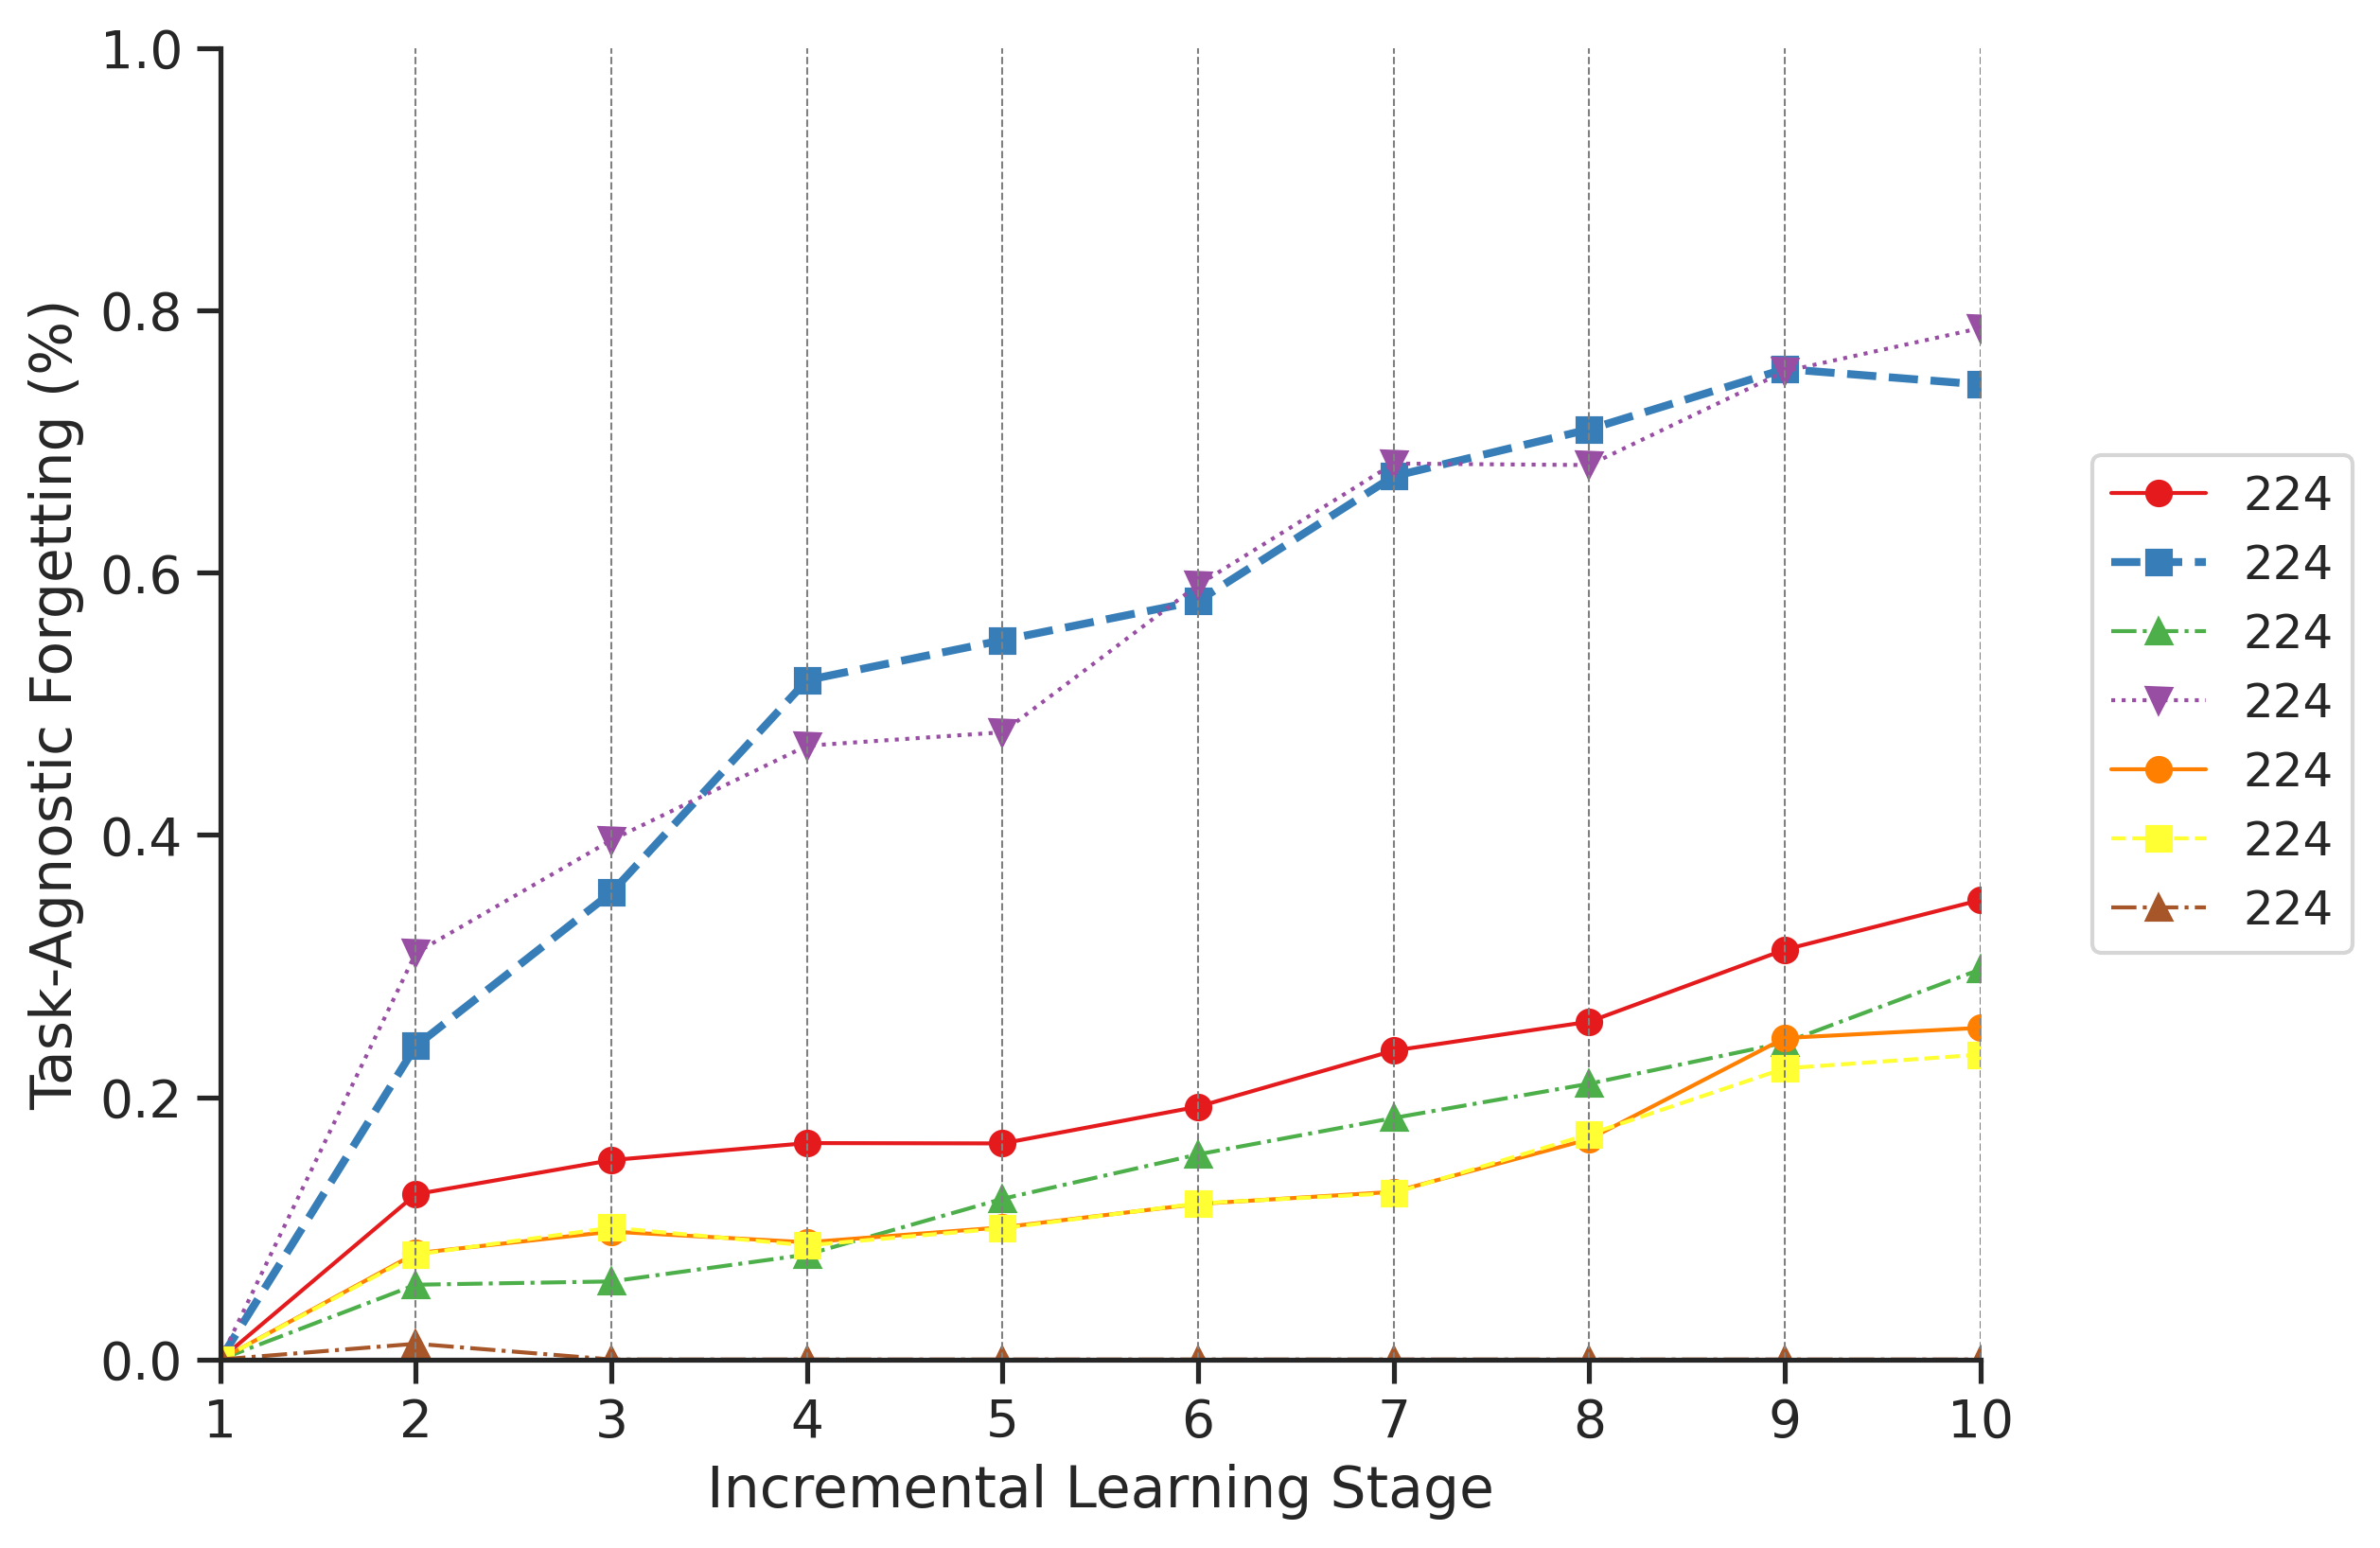

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import mplcyberpunk
from matplotlib.lines import Line2D

# 获取当前日期
now = datetime.now()
date_string = now.strftime("%Y-%m-%d")

# 读取CSV文件
df = pd.read_csv(result_filename)

# 设置画布大小和分辨率
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# 使用seaborn设置专业风格
sns.set(style="ticks", font_scale=1.2)

# 绘制平滑曲线
x = range(1, df.shape[1])
labels = []
linestyles = ['-', '--', '-.', ':']  # 虚线样式列表
markerstyles = ['o', 's', '^', 'v']  # 端点标记样式列表
colors = sns.color_palette("Set1", n_colors=len(df))  # 从Seaborn调色板获取颜色列表
lines = []  # 存储Line2D对象
for i, row in df.iterrows():
    method = row['Method']
    values = row[1:].tolist()[:df.shape[1]-1]  # 去掉最后一列
    linestyle = linestyles[i % len(linestyles)]
    markerstyle = markerstyles[i % len(markerstyles)]
    color = colors[i]
    
    if "oewc" in method:
        linewidth = 2  # 设置线条粗细为2
    else:
        linewidth = 1  # 使用默认线条粗细
    
    line, = plt.plot(x, values, label=method, lw=linewidth, linestyle=linestyle, marker=markerstyle, color=color)
    lines.append(line)
    labels.append(method.split('_')[1])  # 获取label值中第一个_和第二个_之间的部分

# 设置 X 和 Y 轴的范围
plt.xlim(1, df.shape[1]-1)
plt.ylim(0, 1)

# 设置X轴刻度标签为整数
plt.xticks(range(1, df.shape[1]), range(1, df.shape[1]))

# 添加标签
plt.xlabel('Incremental Learning Stage')  # 设置X轴标题
plt.ylabel('Task-Agnostic Forgetting (%)')  # 设置Y轴标题

# 创建图例
legend_elements = [Line2D([0], [0], color=line.get_color(), linestyle=line.get_linestyle(),
                          marker=line.get_marker(), lw=line.get_linewidth())
                   for line in lines]
plt.legend(legend_elements, labels, loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')

# 增加每个X轴上的列分割线
for val in range(1, df.shape[1]):
    plt.axvline(x=val, linestyle='--', color='gray', linewidth=0.5)

# 移除顶部和右侧的边框
sns.despine()

# 使用mplcyberpunk样式装饰图形，创建医学风格
# mplcyberpunk.add_glow_effects()

# 保存为矢量图格式（PDF、EPS，或SVG）以获得更高质量的输出
plt.savefig(f'curve_plot_{date_string}.pdf', format='pdf', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()


In [14]:
import os
import glob
import csv
from datetime import datetime

# 创建结果文件名
now = datetime.now()
date_string = now.strftime("%Y-%m-%d")
result_filename = f"result_avg_accs_taw_{date_string}.csv"

# 遍历子目录下的txt文件并读取数据
# root_folder = "./results_ViT_S_MedMNIST_ALL_0719"  # 您需要替换为实际的根文件夹路径
data_dict = {}

max_columns = 0  # 最大列数

for foldername, subfolders, filenames in os.walk(root_folder):
    if "results" in subfolders:
        result_folder = os.path.join(foldername, "results")
        # 查找最新创建日期的txt文件
        txt_files = glob.glob(os.path.join(result_folder, "avg_accs_taw-*.txt"))

        if txt_files:
            latest_file = max(txt_files, key=os.path.getctime)
            with open(latest_file, 'r') as file:
                data = file.readlines()
                data_values = [float(val.strip()) for line in data for val in line.split("\t")]

                max_columns = max(max_columns, len(data_values))  # 更新最大列数

            folder_name = os.path.basename(foldername)
            data_dict[folder_name] = data_values

# 写入CSV文件
with open(result_filename, mode='w', newline='') as file:
    writer = csv.writer(file)

    # 写入表头
    header = ['Method'] + list(range(1, max_columns+1))
    writer.writerow(header)

    # 写入数据
    for folder_name, values in data_dict.items():
        row_values = [folder_name] + values + [None]*(max_columns-len(values))  # 添加空值以达到最大列数
        writer.writerow(row_values)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import mplcyberpunk
from matplotlib.lines import Line2D

# 获取当前日期
now = datetime.now()
date_string = now.strftime("%Y-%m-%d")

# 读取CSV文件
df = pd.read_csv(result_filename)

# 读取CSV文件
df = pd.read_csv(result_filename)

# 按最后一列从大到小排序
df_sorted = df.sort_values(by=df.columns[-1], ascending=False)

# 输出排序结果到屏幕上
print(df_sorted)





                                              Method      1       2         3  \
0                    cifar100_224_lwf_5epoch_0713lwf  0.954  0.9655  0.956667   
5  cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.954  0.9510  0.951000   
4  cifar100_224_olwf_asym_original_RD_VIT_VIT+RD_...  0.954  0.9495  0.950333   
2       cifar100_224_icarl_5epoch_0713icarl_exampler  0.949  0.9540  0.957333   
1                  cifar100_224_oewc_5epoch_0713oewc  0.954  0.9365  0.899667   
3      cifar100_224_finetuning_5epoch_0713finetuning  0.954  0.9255  0.915333   
6  cifar100_224_olwf_asym_original_L1normVIT_ATTJ...  0.954  0.6505  0.000000   

         4       5         6         7         8         9      10  
0  0.94200  0.9422  0.924000  0.918714  0.913875  0.913556  0.8988  
5  0.92900  0.9306  0.918000  0.911857  0.908875  0.902889  0.8964  
4  0.92525  0.9278  0.918167  0.910000  0.908625  0.897333  0.8897  
2  0.93675  0.9316  0.914500  0.896000  0.892250  0.889333  0.8820  
1  0.8

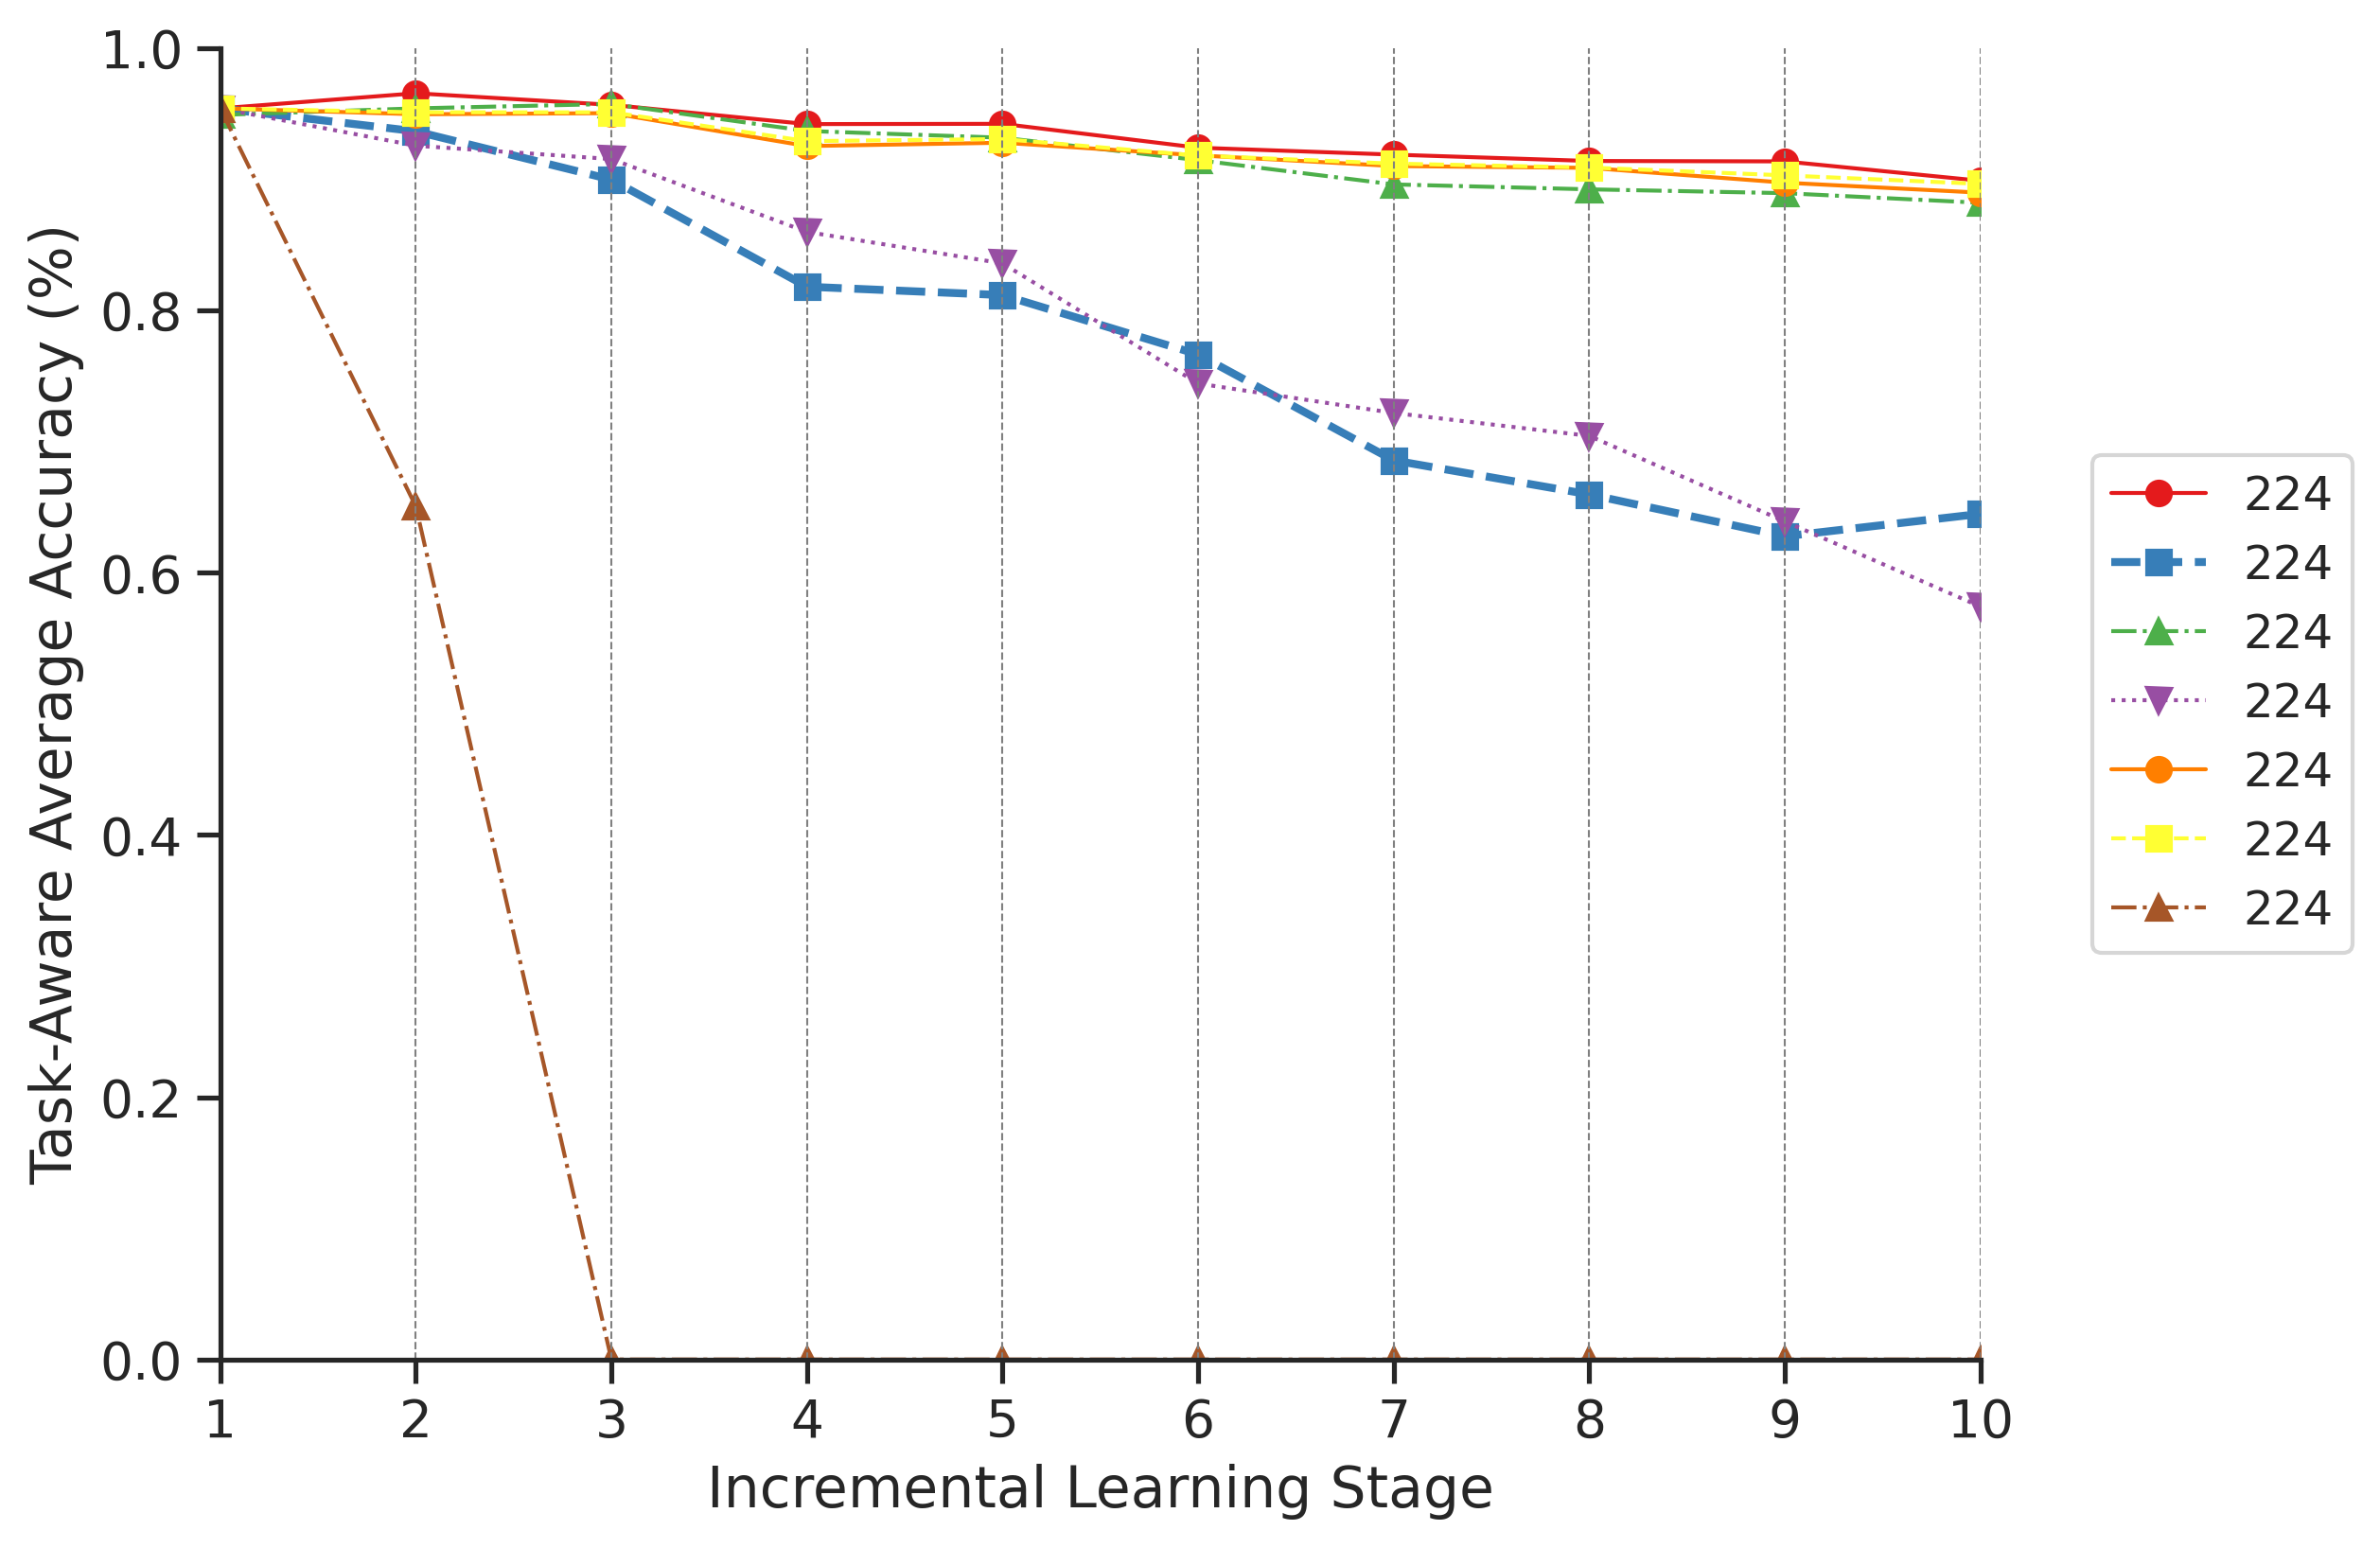

In [15]:
# 设置画布大小和分辨率
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# 使用seaborn设置专业风格
sns.set(style="ticks", font_scale=1.2)

# 绘制平滑曲线
x = range(1, df.shape[1])
labels = []
linestyles = ['-', '--', '-.', ':']  # 虚线样式列表
markerstyles = ['o', 's', '^', 'v']  # 端点标记样式列表
colors = sns.color_palette("Set1", n_colors=len(df))  # 从Seaborn调色板获取颜色列表
lines = []  # 存储Line2D对象
for i, row in df.iterrows():
    method = row['Method']
    values = row[1:].tolist()[:df.shape[1]-1]  # 去掉最后一列
    linestyle = linestyles[i % len(linestyles)]
    markerstyle = markerstyles[i % len(markerstyles)]
    color = colors[i]
    
    if "oewc" in method:
        linewidth = 2  # 设置线条粗细为2
    else:
        linewidth = 1  # 使用默认线条粗细
    
    line, = plt.plot(x, values, label=method, lw=linewidth, linestyle=linestyle, marker=markerstyle, color=color)
    lines.append(line)
    labels.append(method.split('_')[1])  # 获取label值中第一个_和第二个_之间的部分

# 设置 X 和 Y 轴的范围
plt.xlim(1, df.shape[1]-1)
plt.ylim(0, 1)

# 设置X轴刻度标签为整数
plt.xticks(range(1, df.shape[1]), range(1, df.shape[1]))

# 添加标签
plt.xlabel('Incremental Learning Stage')  # 设置X轴标题
plt.ylabel('Task-Aware Average Accuracy (%)')  # 设置Y轴标题

# 创建图例
legend_elements = [Line2D([0], [0], color=line.get_color(), linestyle=line.get_linestyle(),
                          marker=line.get_marker(), lw=line.get_linewidth())
                   for line in lines]
plt.legend(legend_elements, labels, loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')



# 增加每个X轴上的列分割线
for val in range(1, df.shape[1]):
    plt.axvline(x=val, linestyle='--', color='gray', linewidth=0.5)

# 移除顶部和右侧的边框
sns.despine()

# 使用mplcyberpunk样式装饰图形，创建医学风格
# mplcyberpunk.add_glow_effects()

# 保存为矢量图格式（PDF、EPS，或SVG）以获得更高质量的输出
plt.savefig(f'curve_plot_{date_string}.pdf', format='pdf', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

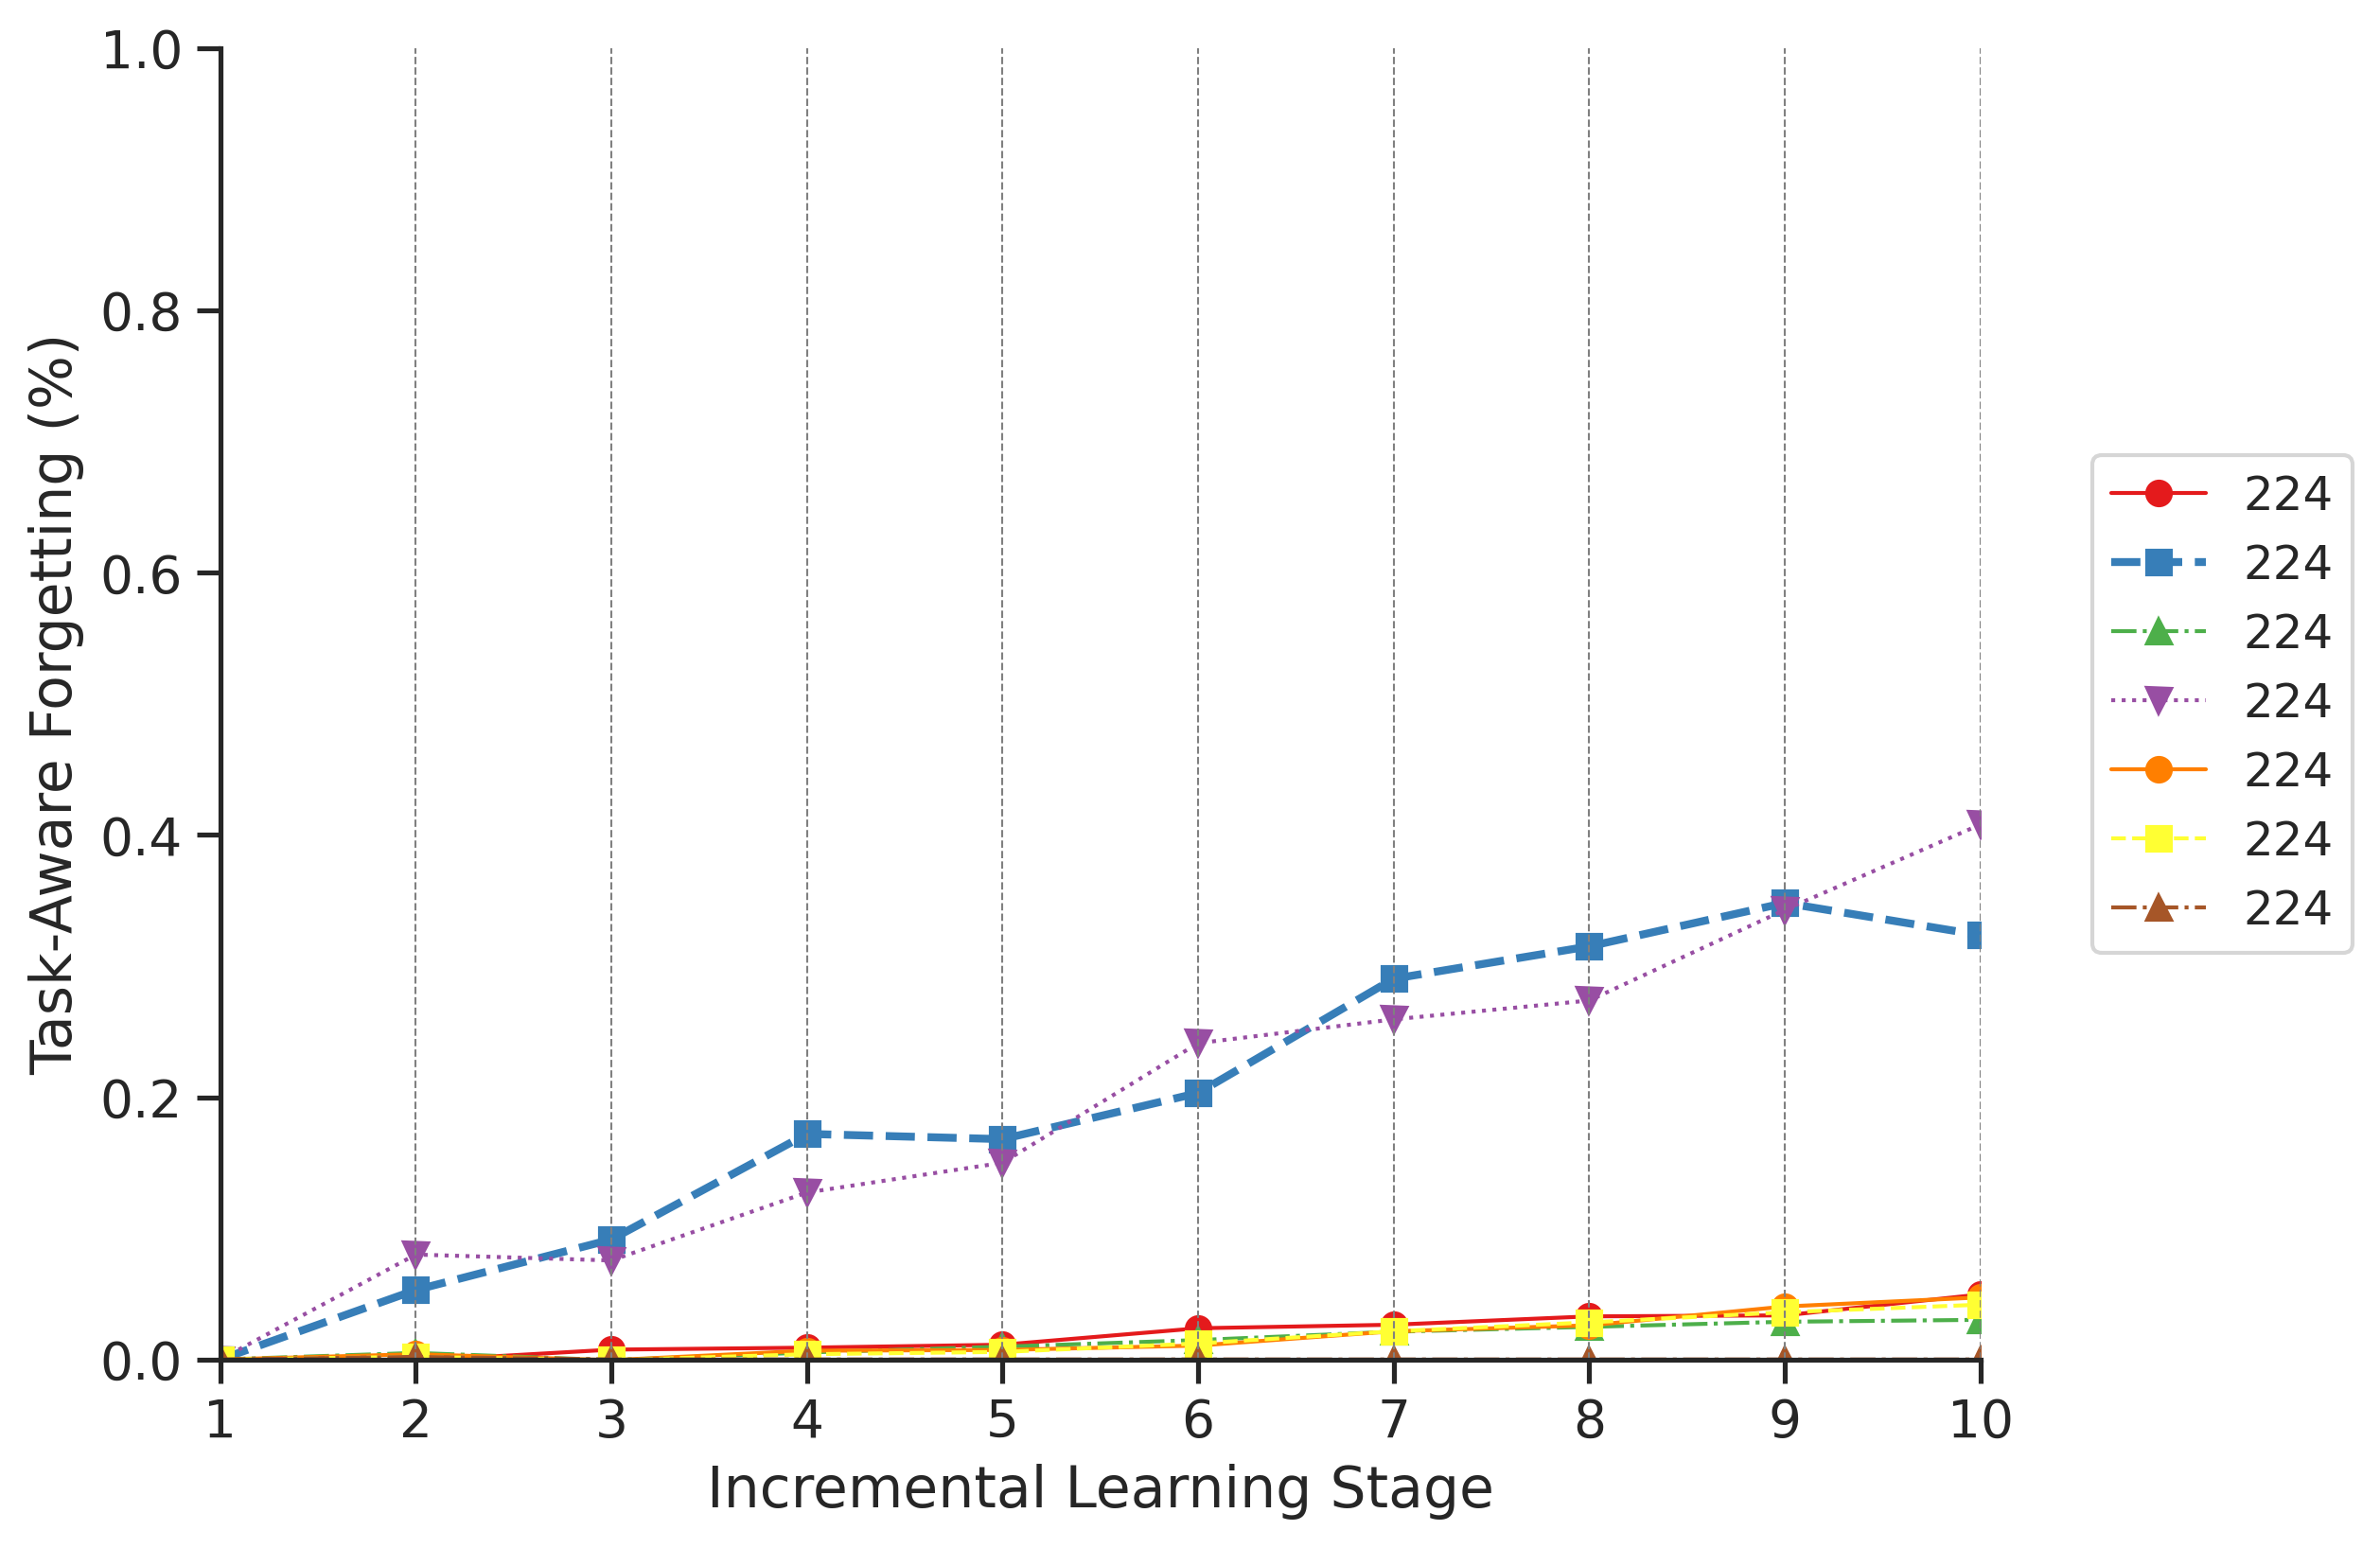

In [16]:
#读取avg_forg_tag

import os
import glob
import csv
from datetime import datetime

# 创建结果文件名
now = datetime.now()
date_string = now.strftime("%Y-%m-%d")
result_filename = f"result_avg_forg_taw_{date_string}.csv"

# 遍历子目录下的txt文件并读取数据
# root_folder = "./results_ViT_S_MedMNIST_ALL_0719"  # 您需要替换为实际的根文件夹路径
data_dict = {}

max_columns = 0  # 最大列数

for foldername, subfolders, filenames in os.walk(root_folder):
    if "results" in subfolders:
        result_folder = os.path.join(foldername, "results")
        # 查找最新创建日期的txt文件
        txt_files = glob.glob(os.path.join(result_folder, "avg_forg_taw-*.txt"))

        if txt_files:
            latest_file = max(txt_files, key=os.path.getctime)
            with open(latest_file, 'r') as file:
                data = file.readlines()
                data_values = [float(val.strip()) for line in data for val in line.split("\t")]

                max_columns = max(max_columns, len(data_values))  # 更新最大列数

            folder_name = os.path.basename(foldername)
            data_dict[folder_name] = data_values

# 写入CSV文件
with open(result_filename, mode='w', newline='') as file:
    writer = csv.writer(file)

    # 写入表头
    header = ['Method'] + list(range(1, max_columns+1))
    writer.writerow(header)

    # 写入数据
    for folder_name, values in data_dict.items():
        row_values = [folder_name] + values + [None]*(max_columns-len(values))  # 添加空值以达到最大列数
        writer.writerow(row_values)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import mplcyberpunk
from matplotlib.lines import Line2D

# 获取当前日期
now = datetime.now()
date_string = now.strftime("%Y-%m-%d")

# 读取CSV文件
df = pd.read_csv(result_filename)

# 设置画布大小和分辨率
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# 使用seaborn设置专业风格
sns.set(style="ticks", font_scale=1.2)

# 绘制平滑曲线
x = range(1, df.shape[1])
labels = []
linestyles = ['-', '--', '-.', ':']  # 虚线样式列表
markerstyles = ['o', 's', '^', 'v']  # 端点标记样式列表
colors = sns.color_palette("Set1", n_colors=len(df))  # 从Seaborn调色板获取颜色列表
lines = []  # 存储Line2D对象
for i, row in df.iterrows():
    method = row['Method']
    values = row[1:].tolist()[:df.shape[1]-1]  # 去掉最后一列
    linestyle = linestyles[i % len(linestyles)]
    markerstyle = markerstyles[i % len(markerstyles)]
    color = colors[i]
    
    if "oewc" in method:
        linewidth = 2  # 设置线条粗细为2
    else:
        linewidth = 1  # 使用默认线条粗细
    
    line, = plt.plot(x, values, label=method, lw=linewidth, linestyle=linestyle, marker=markerstyle, color=color)
    lines.append(line)
    labels.append(method.split('_')[1])  # 获取label值中第一个_和第二个_之间的部分

# 设置 X 和 Y 轴的范围
plt.xlim(1, df.shape[1]-1)
plt.ylim(0, 1)

# 设置X轴刻度标签为整数
plt.xticks(range(1, df.shape[1]), range(1, df.shape[1]))

# 添加标签
plt.xlabel('Incremental Learning Stage')  # 设置X轴标题
plt.ylabel('Task-Aware Forgetting (%)')  # 设置Y轴标题

# 创建图例
legend_elements = [Line2D([0], [0], color=line.get_color(), linestyle=line.get_linestyle(),
                          marker=line.get_marker(), lw=line.get_linewidth())
                   for line in lines]
plt.legend(legend_elements, labels, loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')

# 增加每个X轴上的列分割线
for val in range(1, df.shape[1]):
    plt.axvline(x=val, linestyle='--', color='gray', linewidth=0.5)

# 移除顶部和右侧的边框
sns.despine()

# 使用mplcyberpunk样式装饰图形，创建医学风格
# mplcyberpunk.add_glow_effects()

# 保存为矢量图格式（PDF、EPS，或SVG）以获得更高质量的输出
plt.savefig(f'curve_plot_{date_string}.pdf', format='pdf', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

